In [ ]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Device
import tensorflow as tf
from tensorflow.python.client import device_lib
print('Current Device: ', tf.test.gpu_device_name() + '\n')
device_lib.list_local_devices()



Current Device:  /device:GPU:0



[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17495599312201847515
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13104394244745146968
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
# RAM: 
!cat /proc/meminfo


MemTotal:       13298572 kB
MemFree:         8623896 kB
MemAvailable:   11374416 kB
Buffers:          117608 kB
Cached:          2571168 kB
SwapCached:            0 kB
Active:          1930140 kB
Inactive:        2382024 kB
Active(anon):    1354724 kB
Inactive(anon):    10708 kB
Active(file):     575416 kB
Inactive(file):  2371316 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              2468 kB
Writeback:             0 kB
AnonPages:       1623312 kB
Mapped:           748012 kB
Shmem:             11456 kB
KReclaimable:      90736 kB
Slab:             147384 kB
SReclaimable:      90736 kB
SUnreclaim:        56648 kB
KernelStack:        6304 kB
PageTables:        19144 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6649284 kB
Committed_AS:    4458336 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       52464 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
# CPU: 
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

# **Import Library**

In [ ]:
pip install -q -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 4.9 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
from keras import backend as K
import pickle
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, LayerNormalization, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
from keras.regularizers import l2, l1
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.utils import compute_class_weight
import time

from tensorflow_addons.layers import GroupNormalization, InstanceNormalization
from tensorflow_addons.optimizers import LazyAdam, Yogi, AdamW

# **Import Data**

***ImageDataGenerator***

In [ ]:
aug = ImageDataGenerator(
    rotation_range=42, width_shift_range=0.1,
    height_shift_range=0.1, 
    zoom_range=0.2,
    fill_mode = 'constant', cval = 0)

In [ ]:
datagen = ImageDataGenerator(
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
#  shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')

***Scaled data***

In [ ]:
# Scaled data
pickle_in = open("/content/drive/MyDrive/PickleData/All/X_all.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/PickleData/All/y_all.pickle","rb")
y = pickle.load(pickle_in)

print(X.shape)
print(y.shape)

(1925, 128, 128, 3)
(1925,)


In [ ]:
# Scaled data 224
pickle_in = open("/content/drive/MyDrive/PickleData/All/X_224.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/PickleData/All/y_224.pickle","rb")
y = pickle.load(pickle_in)

print(X.shape)
print(y.shape)

(1925, 224, 224, 3)
(1925,)


In [ ]:
print(X[1])

***Get labels***

In [ ]:
DATA_path = "/content/drive/MyDrive/ImageDB/Total"
CAC_BENH = os.listdir(DATA_path)
num_class = len(CAC_BENH)
print(CAC_BENH)
print(num_class)

['Alternaria Leaf Blight', 'Canker', 'Chlorosis', 'Esca', 'Eyespot', 'Khoe manh', 'Monilia', 'Northern leaf blight', 'Phan trang', 'Rust', 'Suong mai', 'Than thu', 'Cedar-apple rust', 'Black mold', 'Ghost spot', 'Apple scab', 'Verticillium wilt']
17


# **Create Model**

In [ ]:
def focal_loss(gamma=2., alpha=4.):

    gamma = float(gamma)
    alpha = float(alpha)

    def focal_loss_fixed(y_true, y_pred):
        """Focal loss for multi-classification
        FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
        Notice: y_pred is probability after softmax
        gradient is d(Fl)/d(p_t) not d(Fl)/d(x) as described in paper
        d(Fl)/d(p_t) * [p_t(1-p_t)] = d(Fl)/d(x)
        Focal Loss for Dense Object Detection
        https://arxiv.org/abs/1708.02002

        Arguments:
            y_true {tensor} -- ground truth labels, shape of [batch_size, num_cls]
            y_pred {tensor} -- model's output, shape of [batch_size, num_cls]

        Keyword Arguments:
            gamma {float} -- (default: {2.0})
            alpha {float} -- (default: {4.0})

        Returns:
            [tensor] -- loss.
        """
        epsilon = 1e-9
        y_true = tf.convert_to_tensor(y_true.astype(np.float32), tf.float32)
        y_pred = tf.convert_to_tensor(y_pred.astype(np.float32), tf.float32)

        model_out = tf.add(y_pred, epsilon)
        ce = tf.multiply(y_true, -tf.math.log(model_out))
        weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
        fl = tf.multiply(alpha, tf.multiply(weight, ce))
        reduced_fl = tf.reduce_max(fl, axis=1)
        return tf.reduce_mean(reduced_fl)
    return focal_loss_fixed

In [ ]:
def CNN_model():
    model = Sequential()

    #1
    # model.add(Conv2D(32, (3, 3), input_shape=( 128, 128, 3), padding='same')) # 32 filters, filter_size = 3x3x3(RGB)
    # model.add(Conv2D(32, (1, 1), input_shape=( 128, 128, 3), activation='relu'))
    model.add(Conv2D(32, (1, 1), input_shape=( 224, 224, 3), activation='relu'))
    # model.add(Activation('relu'))
    #model.add(Conv2D(32, (1, 1)))
    #model.add(Activation('relu'))
    model.add(GroupNormalization())
    # model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    
    #2
    model.add(Conv2D(64, (1, 1), activation='relu'))
    # model.add(Activation('relu'))
    # model.add(Conv2D(64, (3, 3)))
    # model.add(Activation('relu'))
    model.add(GroupNormalization())
    # model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    
    #3
    model.add(Conv2D(128, (1, 1), activation='relu'))
    # model.add(Activation('relu'))
    # model.add(Conv2D(128, (3, 3)))
    # model.add(BatchNormalization())
    model.add(GroupNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    
    #4
    model.add(Conv2D(256, (1, 1), activation='relu'))
    # model.add(Activation('relu'))
    # model.add(Conv2D(256, (3, 3)))
    # model.add(Activation('relu'))
    model.add(GroupNormalization())
    # model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    #5
    model.add(Conv2D(512, (1, 1), activation='relu'))
    # model.add(Activation('relu'))
    # model.add(Conv2D(256, (3, 3)))
    # model.add(Activation('relu'))
    model.add(GroupNormalization())
    # model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

    # model.add(Dense(512, kernel_regularizer=regularizers.L1L2( 0.0001, 0.0001)))
    
    model.add(Dense(512, activation='relu'))
    # model.add(Activation('relu'))
    # model.add(BatchNormalization())
    model.add(GroupNormalization())

    model.add(Dense(num_class))
    model.add(Activation('softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
    # model.compile(loss=focal_loss(gamma=2, alpha=1),
    #               optimizer = tfa.optimizers.LazyAdam(),
    #               metrics=['accuracy'])
    
    return model

In [ ]:
model = CNN_model()
model.summary(line_length=105)

Model: "sequential"
_________________________________________________________________________________________________________
 Layer (type)                                  Output Shape                              Param #         
 conv2d (Conv2D)                               (None, 224, 224, 32)                      128             
                                                                                                         
 group_normalization (GroupNormalization)      (None, 224, 224, 32)                      64              
                                                                                                         
 max_pooling2d (MaxPooling2D)                  (None, 112, 112, 32)                      0               
                                                                                                         
 conv2d_1 (Conv2D)                             (None, 112, 112, 64)                      2112            
                          

# **Train Model**

***LearningRate_Schedule***

In [ ]:
from tensorflow.keras import callbacks

# YOUR CODE HERE: define an early stopping callback
early_stopping = callbacks.EarlyStopping(patience = 20, restore_best_weights=True, monitor='loss', min_delta=0)

# lr_schedule = callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.2, patience=10, min_delta=0.0001)
lr_schedule = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2, patience=6, min_delta=0)

# ***Fast Test***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

In [ ]:
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )
class_weights = dict(zip(np.unique(y), class_weights))
class_weights

{0: 0.9436274509803921,
 1: 1.6775599128540306,
 2: 1.0065359477124183,
 3: 1.561866125760649,
 4: 1.742081447963801,
 5: 0.22202998846597463,
 6: 1.709211986681465,
 7: 1.6176470588235294,
 8: 0.43762432509235577,
 9: 1.3128729752770674,
 10: 1.4379084967320261,
 11: 1.811764705882353,
 12: 2.0130718954248366,
 13: 1.8487394957983194,
 14: 1.6775599128540306,
 15: 1.4611005692599621,
 16: 1.2241653418124006}

In [ ]:
# Fast test
# X_train, X_test, y_train, y_test = train_test_split(X_ns, y_ns, test_size = 0.2, random_state = 25)
my_model = CNN_model()
fast_history = []
fast_train_res = []
fast_test_res = []
fast_history.append(my_model.fit(datagen.flow(X_train, y_train, batch_size = 32), 
                               batch_size = 32, 
                               epochs = 250, 
                               class_weight = class_weights,
                               callbacks = [early_stopping, lr_schedule]
                               ))
# fast_history.append(my_model.fit(X_train, y_train, batch_size=32, epochs= 30, callbacks = [early_stopping, lr_schedule], class_weight = class_weights))
# fast_history.append(my_model.fit(X_train, y_train, batch_size=32, epochs= 30, callbacks = [early_stopping, lr_schedule]))

my_model.evaluate(X_train, y_train)
my_model.evaluate(X_test, y_test)

Epoch 1/250
49/49 [==============================] - 31s 341ms/step - loss: 2.9880 - accuracy: 0.1636 - lr: 0.0010
Epoch 2/250
49/49 [==============================] - 17s 349ms/step - loss: 1.5926 - accuracy: 0.4156 - lr: 0.0010
Epoch 3/250
49/49 [==============================] - 17s 348ms/step - loss: 1.3040 - accuracy: 0.5260 - lr: 0.0010
Epoch 4/250
49/49 [==============================] - 18s 360ms/step - loss: 1.2161 - accuracy: 0.5695 - lr: 0.0010
Epoch 5/250
49/49 [==============================] - 18s 369ms/step - loss: 0.9760 - accuracy: 0.6403 - lr: 0.0010
Epoch 6/250
49/49 [==============================] - 17s 349ms/step - loss: 0.9278 - accuracy: 0.6383 - lr: 0.0010
Epoch 7/250
49/49 [==============================] - 17s 351ms/step - loss: 0.7917 - accuracy: 0.6955 - lr: 0.0010
Epoch 8/250
49/49 [==============================] - 17s 349ms/step - loss: 0.7177 - accuracy: 0.7227 - lr: 0.0010
Epoch 9/250
49/49 [==============================] - 17s 354ms/step - loss: 0.63

[0.5710061192512512, 0.8441558480262756]

                        precision    recall  f1-score   support

Alternaria Leaf Blight       1.00      1.00      1.00        96
                Canker       1.00      1.00      1.00        54
             Chlorosis       1.00      1.00      1.00        90
                  Esca       1.00      1.00      1.00        58
               Eyespot       1.00      1.00      1.00        52
             Khoe manh       1.00      1.00      1.00       408
               Monilia       1.00      1.00      1.00        53
  Northern leaf blight       1.00      1.00      1.00        56
            Phan trang       1.00      1.00      1.00       207
                  Rust       1.00      1.00      1.00        69
             Suong mai       1.00      1.00      1.00        63
              Than thu       1.00      1.00      1.00        50
      Cedar-apple rust       1.00      1.00      1.00        45
            Black mold       1.00      1.00      1.00        49
            Ghost spot       1.00      

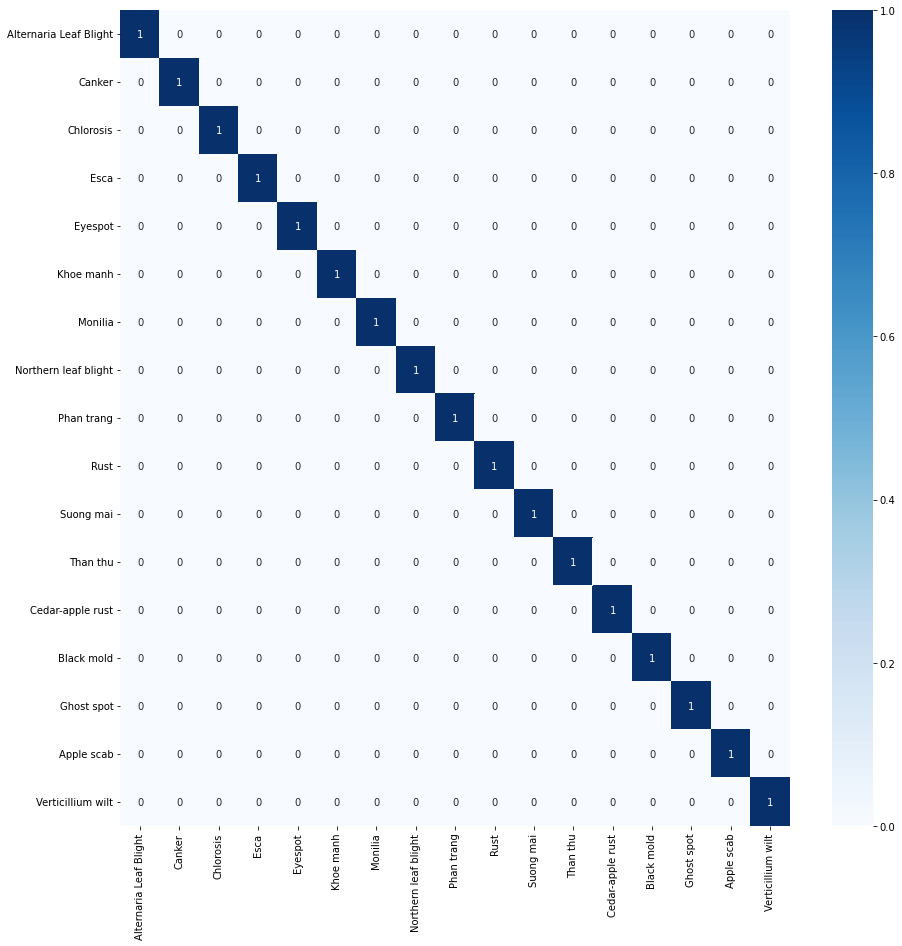

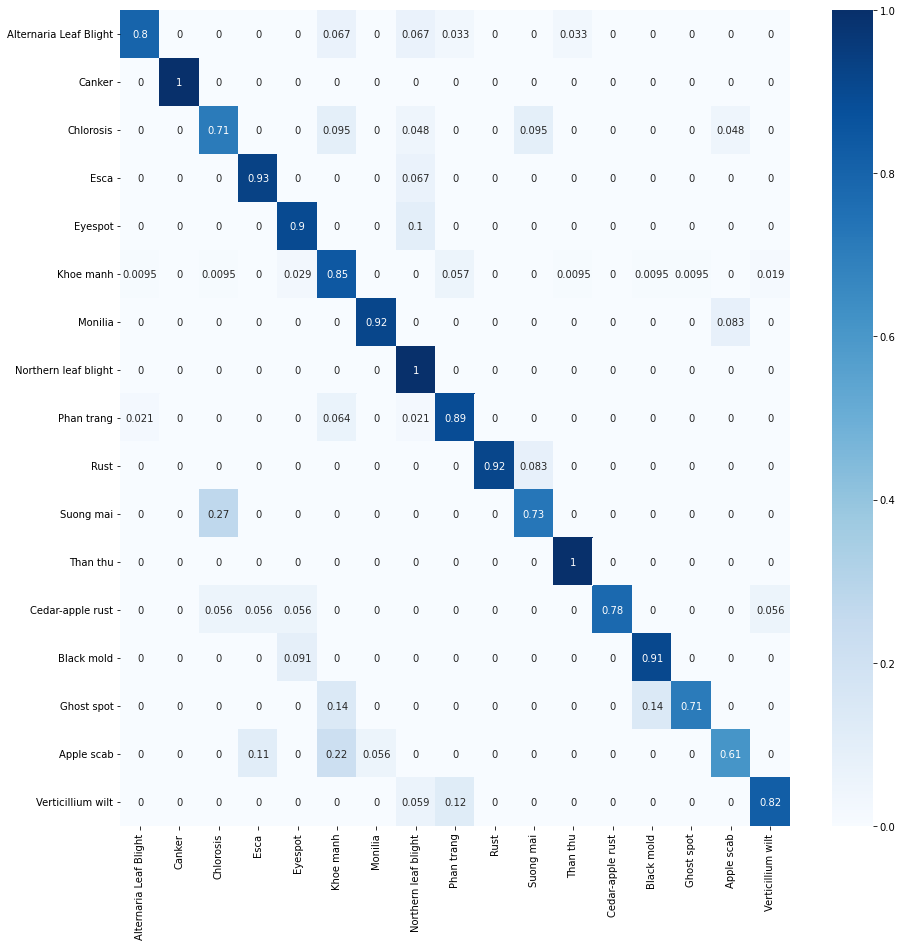

In [ ]:
def result_matrix(X, y):
  predict = my_model.predict(X)
  predicted_labels = []
  for vector in predict:
    predicted_labels.append(np.argmax(vector))
  predicted_labels = np.array(predicted_labels)

  print(classification_report(y, predicted_labels, target_names=CAC_BENH))
  
  fig = plt.figure(figsize=(15, 15))
  mtx = confusion_matrix(y, predicted_labels )
  mtx = mtx/mtx.sum(axis = 1, keepdims = True)
  sns.heatmap(mtx, annot=True, cmap='Blues', xticklabels= CAC_BENH, yticklabels = CAC_BENH )

result_matrix(X_train, y_train)
result_matrix(X_test, y_test)

In [ ]:
y_pred = np.argmax(my_model.predict(X_train), axis=-1)

# avg = 'micro'
avg = 'macro'
# avg = 'weighted'

#Model Accuracy: Số mẫu được gán nhãn chính xác/Tổng sỗ mẫu test
print("Accuracy: ", metrics.accuracy_score(y_train, y_pred))

#Model precision: Số mẫu được gán nhãn alpha chính xác/tổng số mẫu được gán nhãn là alpha
print("Precision: ", metrics.precision_score(y_train, y_pred, average=avg))

#Model recall: Số mẫu được gán nhãn alpha chính xác/Tổng số mẫu thực sự là alpha
print("Recall: ", metrics.recall_score(y_train, y_pred, average=avg))

print("F1-Score: ", metrics.f1_score(y_train, y_pred,average=avg))


#                   |      Predicted      |      Predicted      |
#                   |     as Positive     |     as Negative     |
# ------------------|---------------------|---------------------|
#  Actual: Positive | True Positive (TP)  | False Negative (FN) |
# ------------------|---------------------|---------------------|
#  Actual: Negative | False Positive (FP) | True Negative (TN)  |
# ------------------|---------------------|---------------------|

# Precision được định nghĩa là tỉ lệ số điểm true positive trong số những điểm được phân loại là positive (TP + FP).
# Precision = TP / (TP + FP)

# Recall được định nghĩa là tỉ lệ số điểm true positive trong số những điểm thực sự là positive (TP + FN).
# Recall = TP / (TP + FN)

In [ ]:
y_pred = np.argmax(my_model.predict(X_test), axis=-1)

avg = 'micro'

#Model Accuracy: Số mẫu được gán nhãn chính xác/Tổng sỗ mẫu test
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

#Model precision: Số mẫu được gán nhãn alpha chính xác/tổng số mẫu được gán nhãn là alpha
print("Precision: ", metrics.precision_score(y_test, y_pred, average=avg))

#Model recall: Số mẫu được gán nhãn alpha chính xác/Tổng số mẫu thực sự là alpha
print("Recall: ", metrics.recall_score(y_test, y_pred, average=avg))

print("F1-Score: ", metrics.f1_score(y_test, y_pred,average=avg))


#                   |      Predicted      |      Predicted      |
#                   |     as Positive     |     as Negative     |
# ------------------|---------------------|---------------------|
#  Actual: Positive | True Positive (TP)  | False Negative (FN) |
# ------------------|---------------------|---------------------|
#  Actual: Negative | False Positive (FP) | True Negative (TN)  |
# ------------------|---------------------|---------------------|

# Precision được định nghĩa là tỉ lệ số điểm true positive trong số những điểm được phân loại là positive (TP + FP).
# Precision = TP / (TP + FP)

# Recall được định nghĩa là tỉ lệ số điểm true positive trong số những điểm thực sự là positive (TP + FN).
# Recall = TP / (TP + FN)

# ***5 Folds***

In [ ]:
def result_matrix(model, X, y):
  predict = model.predict(X)
  predicted_labels = []
  for vector in predict:
    predicted_labels.append(np.argmax(vector))
  predicted_labels = np.array(predicted_labels)

  print(classification_report(y, predicted_labels, target_names=CAC_BENH))
  
  fig = plt.figure(figsize=(15, 15))
  mtx = confusion_matrix(y, predicted_labels )
  mtx = mtx/mtx.sum(axis = 1, keepdims = True)
  sns.heatmap(mtx, annot=True, cmap='Blues', xticklabels= CAC_BENH, yticklabels = CAC_BENH )

In [ ]:
def res_show(my_model, X, y):
  y_pred = np.argmax(my_model.predict(X), axis=-1)

  # avg = 'micro'
  avg = 'macro'
  # avg = 'weighted'

  #Model Accuracy: Số mẫu được gán nhãn chính xác/Tổng sỗ mẫu test
  print("Accuracy: ", metrics.accuracy_score(y, y_pred))

  #Model precision: Số mẫu được gán nhãn alpha chính xác/tổng số mẫu được gán nhãn là alpha
  print("Precision: ", metrics.precision_score(y, y_pred, average=avg))

  #Model recall: Số mẫu được gán nhãn alpha chính xác/Tổng số mẫu thực sự là alpha
  print("Recall: ", metrics.recall_score(y, y_pred, average=avg))

  print("F1-Score: ", metrics.f1_score(y, y_pred,average=avg))


  #                   |      Predicted      |      Predicted      |
  #                   |     as Positive     |     as Negative     |
  # ------------------|---------------------|---------------------|
  #  Actual: Positive | True Positive (TP)  | False Negative (FN) |
  # ------------------|---------------------|---------------------|
  #  Actual: Negative | False Positive (FP) | True Negative (TN)  |
  # ------------------|---------------------|---------------------|

  # Precision được định nghĩa là tỉ lệ số điểm true positive trong số những điểm được phân loại là positive (TP + FP).
  # Precision = TP / (TP + FP)

# Recall được định nghĩa là tỉ lệ số điểm true positive trong số những điểm thực sự là positive (TP + FN).
# Recall = TP / (TP + FN)

Run 1
Epoch 1/250
49/49 [==============================] - 21s 159ms/step - loss: 2.8053 - accuracy: 0.1396 - lr: 0.0010
Epoch 2/250
49/49 [==============================] - 12s 245ms/step - loss: 1.7860 - accuracy: 0.3831 - lr: 0.0010
Epoch 3/250
49/49 [==============================] - 10s 196ms/step - loss: 1.3862 - accuracy: 0.5208 - lr: 0.0010
Epoch 4/250
49/49 [==============================] - 9s 176ms/step - loss: 1.2960 - accuracy: 0.5357 - lr: 0.0010
Epoch 5/250
49/49 [==============================] - 8s 162ms/step - loss: 1.0029 - accuracy: 0.6000 - lr: 0.0010
Epoch 6/250
49/49 [==============================] - 8s 162ms/step - loss: 0.8753 - accuracy: 0.6481 - lr: 0.0010
Epoch 7/250
49/49 [==============================] - 8s 162ms/step - loss: 0.8674 - accuracy: 0.6578 - lr: 0.0010
Epoch 8/250
49/49 [==============================] - 8s 162ms/step - loss: 0.8458 - accuracy: 0.6617 - lr: 0.0010
Epoch 9/250
49/49 [==============================] - 8s 161ms/step - loss: 0.65

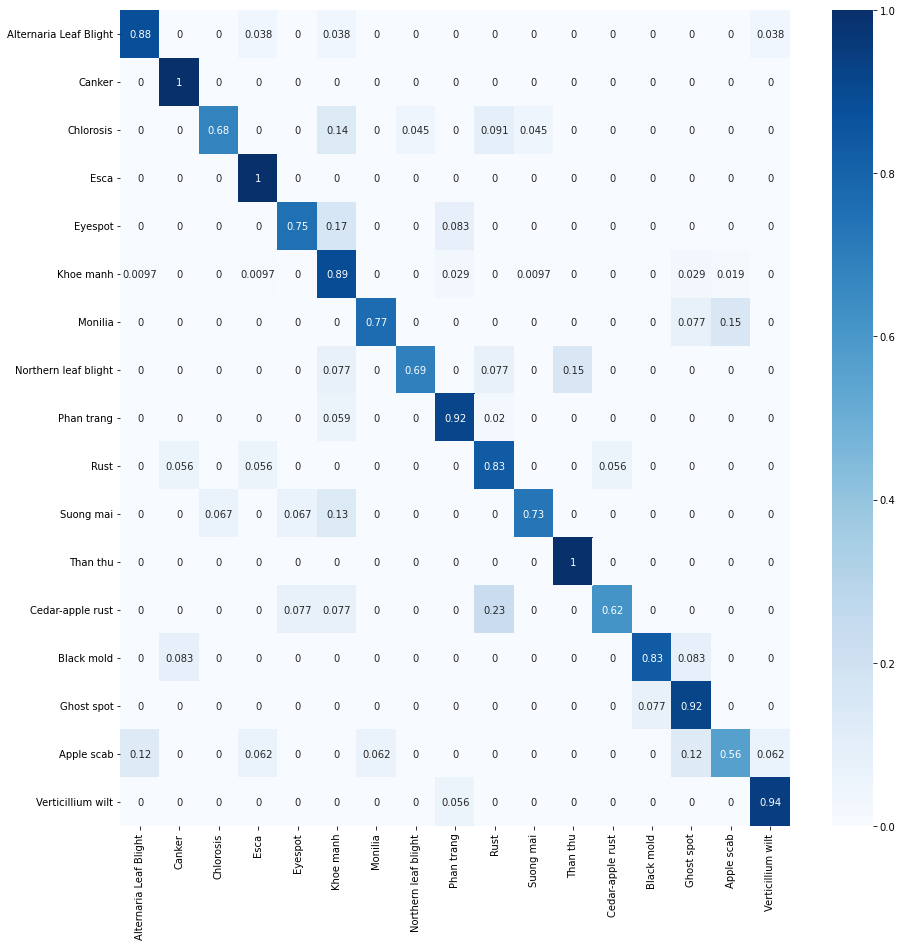

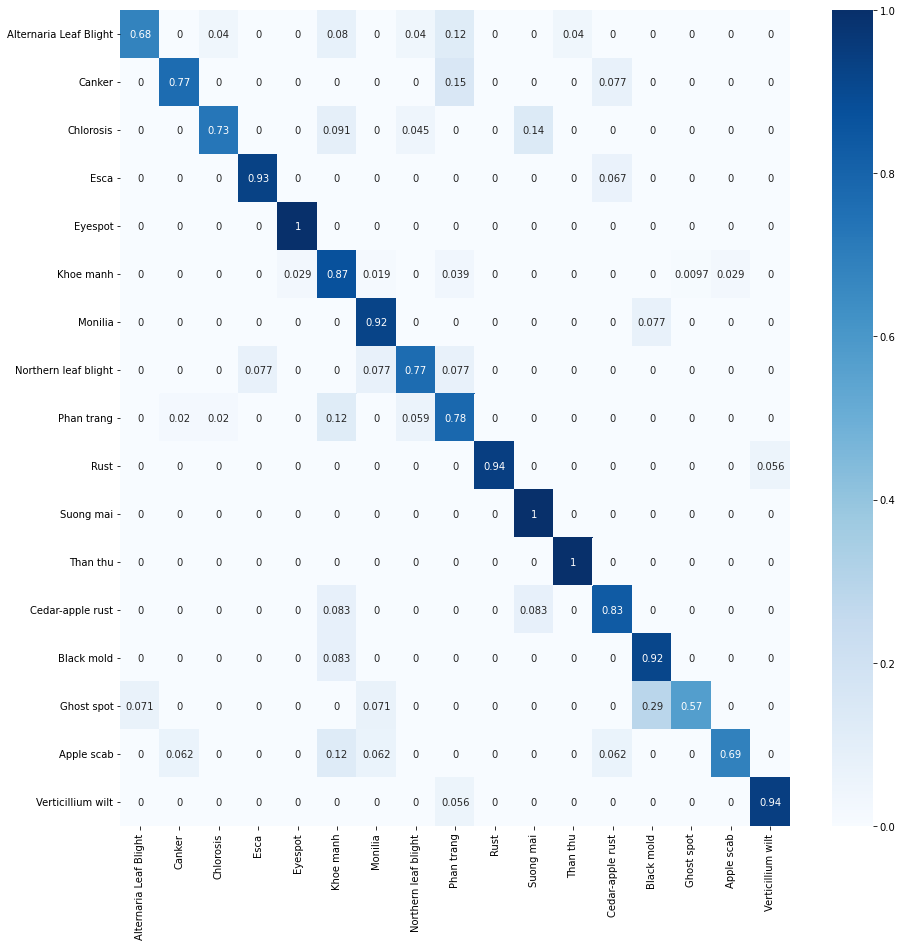

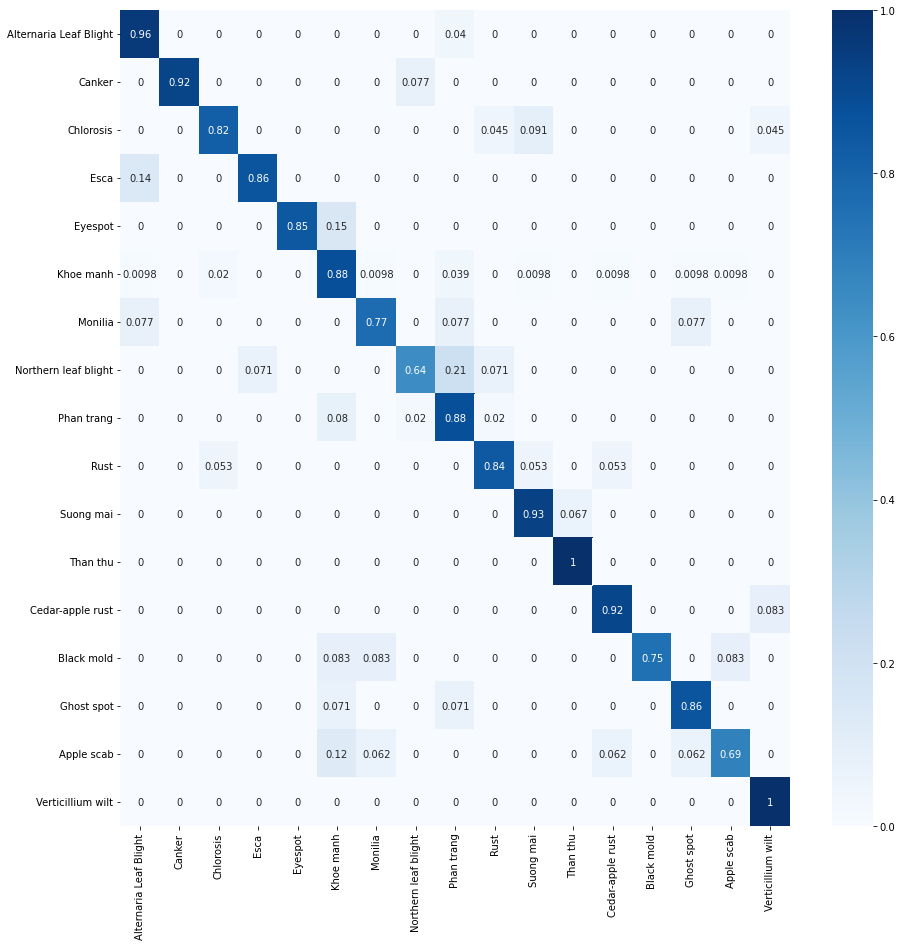

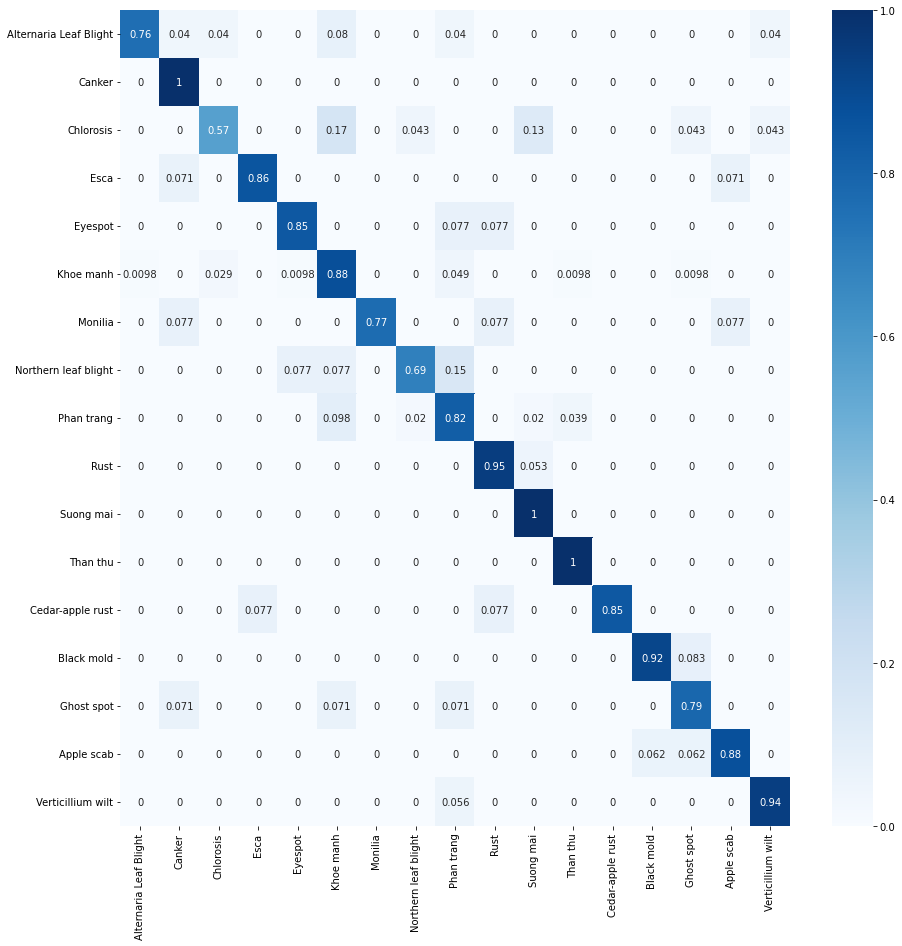

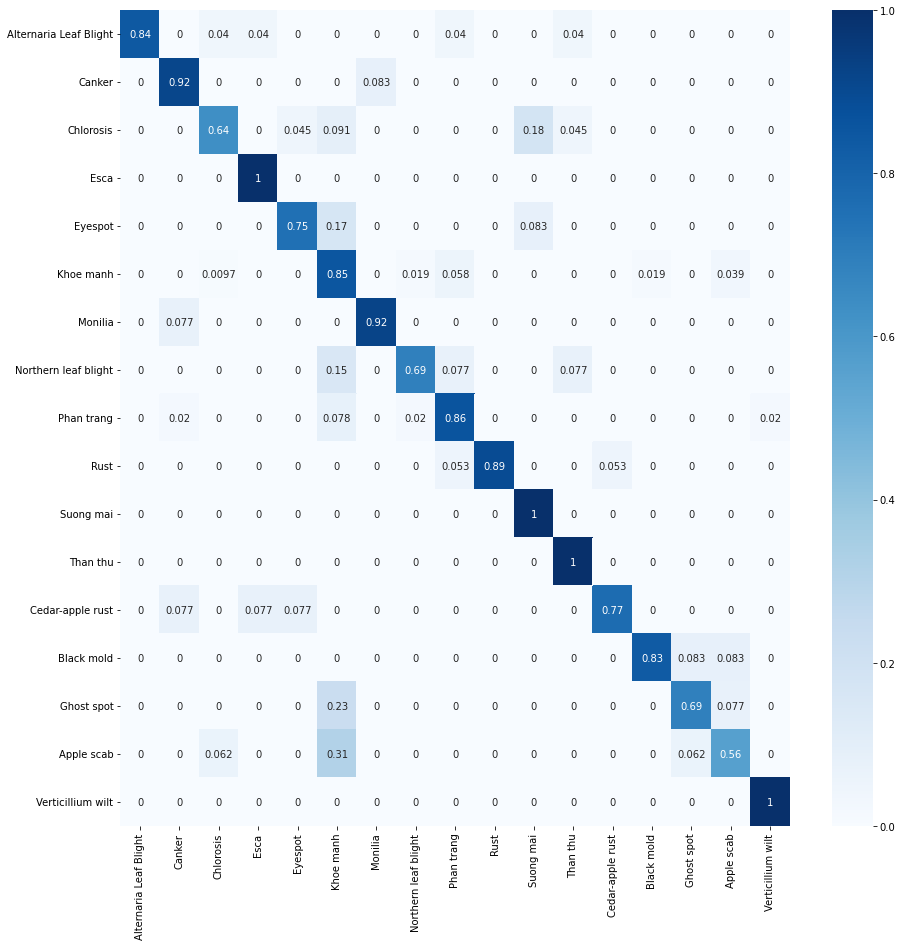

In [ ]:
# BEST 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=45) #45-95.96%

history = []
# my_res = dict.fromkeys(['train_acc', 'test_acc', 'train_precision', 'test_precision', 'train_recall', 'test_recall'
# 'train_f1', 'test_f1', 'fit_times'], [])
training_results = []
testing_results = []
fit_times = []
models = []

i = 1

for train_index, test_index in skf.split(X, y):
      model = None
      model = CNN_model()
      print('Run',i)
      x_train_fold, x_test_fold = X[train_index], X[test_index]
      y_train_fold, y_test_fold = y[train_index], y[test_index]

      class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train_fold),
                                        y = y_train_fold                                                   
                                    )
      class_weights = dict(zip(np.unique(y), class_weights))

      start = time.time()
      history.append(model.fit(datagen.flow(x_train_fold, y_train_fold, batch_size = 32), 
                               batch_size = 32, 
                               epochs = 250,
                               class_weight = class_weights,
                               callbacks = [early_stopping, lr_schedule]
                               ))
      # history.append(model.fit(x_train_fold, y_train_fold, batch_size = 32, epochs = 100))
      fit_times.append(time.time() - start)
      train_loss, train_accuracy = model.evaluate(x_train_fold, y_train_fold)
      test_loss, test_accuracy = model.evaluate(x_test_fold, y_test_fold)
      training_results.append(train_accuracy)
      testing_results.append(test_accuracy)
      models.append(model)

      # models[i].save(storing_path + '/06.04.CNNmodel.train{:.4f}.test{:.4f}.train_time{:.2f}'.format(my_res['train_acc'][i] * 100, my_res['test_acc'][i] * 100, my_res['fit_times'][i]))
      
      # model.save('/content/drive/MyDrive/Total_model/tfaCNNmodel' + '/05.04.{:.6f}.{:.6f}'.format(train_accuracy[i] * 100, test_accuracy[i] * 100))
      i=i+1
      
      res_show(model, x_test_fold, y_test_fold)
      result_matrix(model, x_test_fold, y_test_fold)
      print('======'*12, end='\n\n\n\n\n')

In [ ]:
training_results = np.array(training_results)
testing_results = np.array(testing_results)
fit_times = np.array(fit_times)

print('{: <19}{: <25}{: <23}{: <25}'.format('', 'Training results', 'Testing result','Train time'))
for i in range (5):
   print('{: <19s} {: 10.2f}{:<3} {: 20.2f}{:<}{: 20.2f}{:<}'.format('Experiment' 
   + str(i+1) + ':', training_results[i]*100, '%', testing_results[i]*100, '%', fit_times[i], 's'))
print('--------'*15)
print('{: <19} {: 10.2f}{:<3} {: 20.2f}{:<}{: 20.2f}{:<}'.format('MAX', training_results.max()*100, '%', testing_results.max()*100, '%', fit_times.max(), 's'))
print('{: <19} {: 10.2f}{:<3} {: 20.2f}{:<}{: 20.2f}{:<}'.format('MIN', training_results.min()*100, '%', testing_results.min()*100, '%', fit_times.min(), 's'))
print('{: <19} {: 10.2f}{:<3} {: 20.2f}{:<}{: 20.2f}{:<}'.format('AVERAGE', training_results.mean()*100, '%', testing_results.mean()*100, '%', fit_times.mean(), 's'))

                   Training results         Testing result         Train time               
Experiment1:             99.81%                  84.94%              951.20s
Experiment2:            100.00%                  83.90%             1331.67s
Experiment3:             99.74%                  86.75%             1248.09s
Experiment4:             99.55%                  84.94%              945.63s
Experiment5:             99.87%                  84.16%             1187.29s
------------------------------------------------------------------------------------------------------------------------
MAX                     100.00%                  86.75%             1331.67s
MIN                      99.55%                  83.90%              945.63s
AVERAGE                  99.79%                  84.94%             1132.78s


Run 1
Epoch 1/250
49/49 [==============================] - 10s 164ms/step - loss: 3.2817 - accuracy: 0.1136 - lr: 0.0010
Epoch 2/250
49/49 [==============================] - 8s 165ms/step - loss: 2.0132 - accuracy: 0.2721 - lr: 0.0010
Epoch 3/250
49/49 [==============================] - 8s 165ms/step - loss: 1.5597 - accuracy: 0.4188 - lr: 0.0010
Epoch 4/250
49/49 [==============================] - 8s 165ms/step - loss: 1.3832 - accuracy: 0.5000 - lr: 0.0010
Epoch 5/250
49/49 [==============================] - 8s 165ms/step - loss: 1.1781 - accuracy: 0.5591 - lr: 0.0010
Epoch 6/250
49/49 [==============================] - 8s 166ms/step - loss: 1.1248 - accuracy: 0.5974 - lr: 0.0010
Epoch 7/250
49/49 [==============================] - 8s 165ms/step - loss: 0.9129 - accuracy: 0.6494 - lr: 0.0010
Epoch 8/250
49/49 [==============================] - 8s 163ms/step - loss: 0.8312 - accuracy: 0.6760 - lr: 0.0010
Epoch 9/250
49/49 [==============================] - 8s 165ms/step - loss: 0.6546

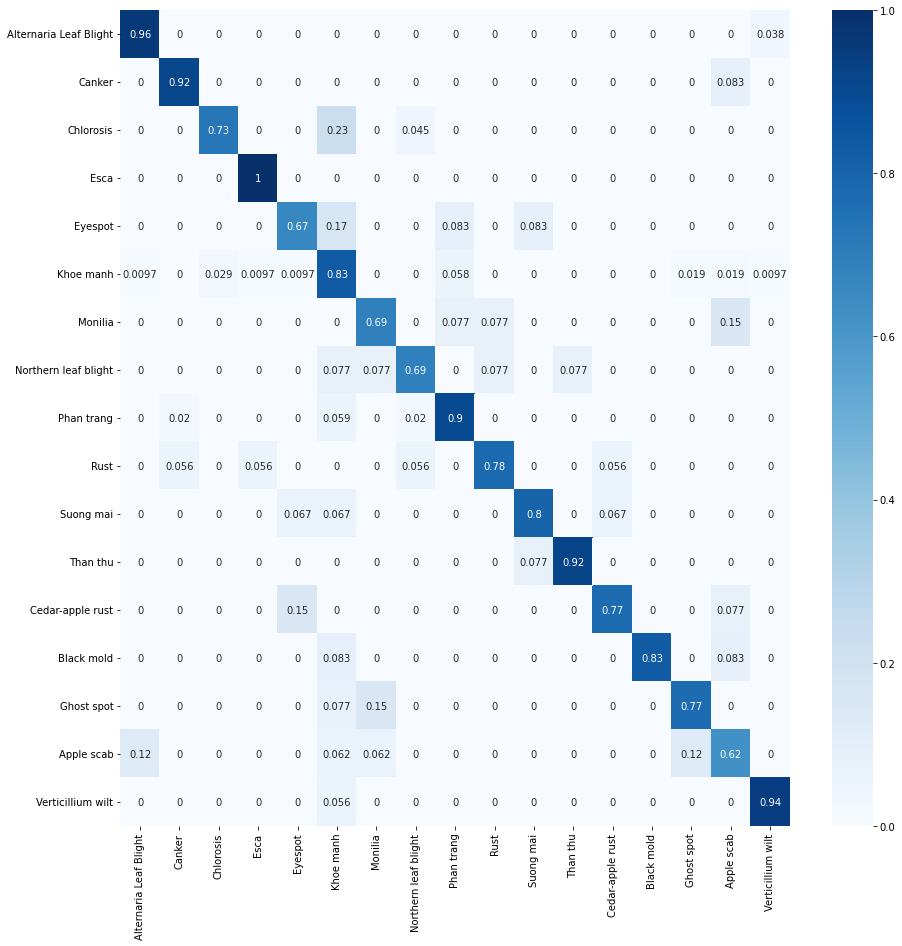

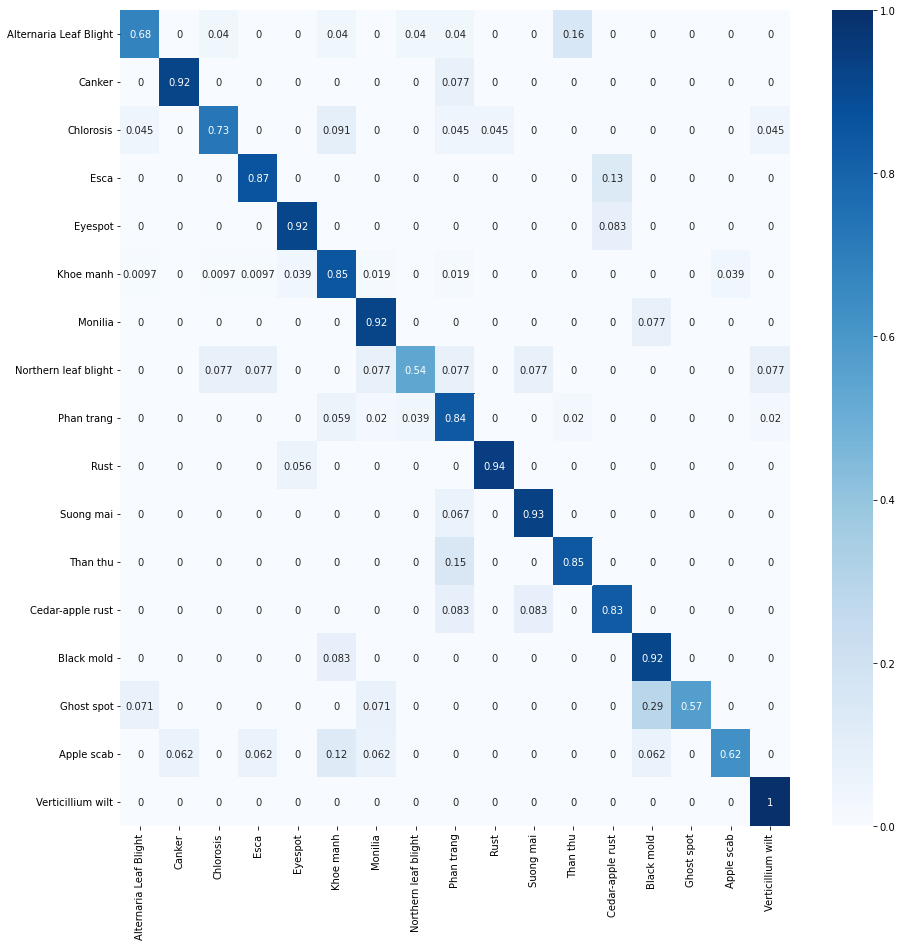

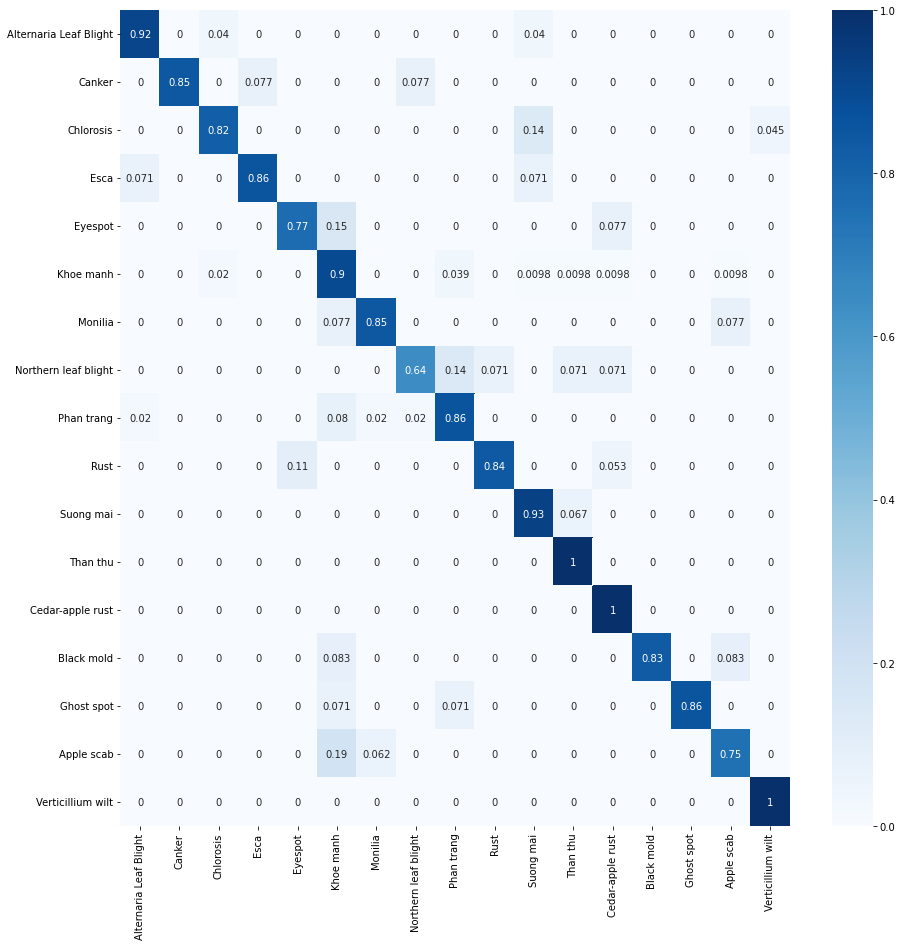

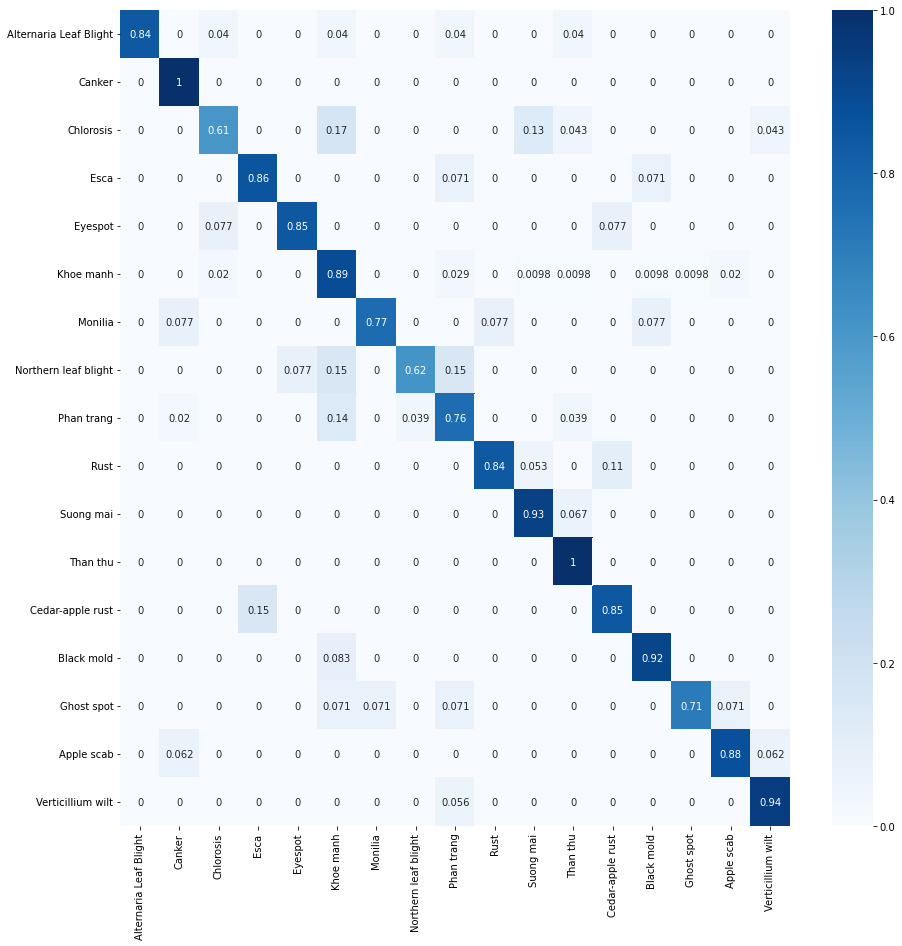

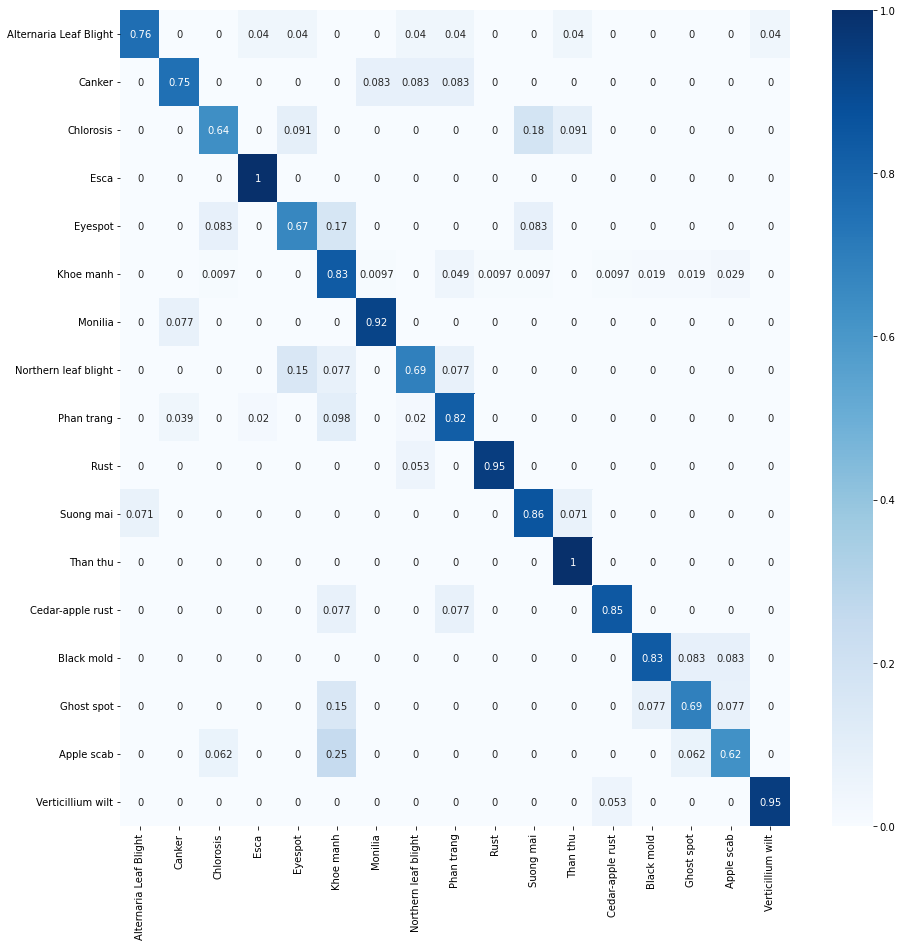

In [ ]:
# 5 folds new LR
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=45) #45-95.96%

history = []
# my_res = dict.fromkeys(['train_acc', 'test_acc', 'train_precision', 'test_precision', 'train_recall', 'test_recall'
# 'train_f1', 'test_f1', 'fit_times'], [])
training_results = []
testing_results = []
fit_times = []
models = []

i = 1

for train_index, test_index in skf.split(X, y):
      model = None
      model = CNN_model()
      print('Run',i)
      x_train_fold, x_test_fold = X[train_index], X[test_index]
      y_train_fold, y_test_fold = y[train_index], y[test_index]

      class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train_fold),
                                        y = y_train_fold                                                   
                                    )
      class_weights = dict(zip(np.unique(y), class_weights))

      start = time.time()
      history.append(model.fit(datagen.flow(x_train_fold, y_train_fold, batch_size = 32), 
                               batch_size = 32, 
                               epochs = 250,
                               class_weight = class_weights,
                               callbacks = [early_stopping, lr_schedule]
                              #  callbacks = [lr_schedule]
                               ))
      # history.append(model.fit(x_train_fold, y_train_fold, batch_size = 32, epochs = 100))
      fit_times.append(time.time() - start)
      train_loss, train_accuracy = model.evaluate(x_train_fold, y_train_fold)
      test_loss, test_accuracy = model.evaluate(x_test_fold, y_test_fold)
      training_results.append(train_accuracy)
      testing_results.append(test_accuracy)
      models.append(model)

      # models[i].save(storing_path + '/06.04.CNNmodel.train{:.4f}.test{:.4f}.train_time{:.2f}'.format(my_res['train_acc'][i] * 100, my_res['test_acc'][i] * 100, my_res['fit_times'][i]))
      
      # model.save('/content/drive/MyDrive/Total_model/tfaCNNmodel' + '/05.04.{:.6f}.{:.6f}'.format(train_accuracy[i] * 100, test_accuracy[i] * 100))
      i=i+1

      res_show(model, x_test_fold, y_test_fold)
      result_matrix(model, x_test_fold, y_test_fold)
      print('======'*12, end='\n\n\n\n\n')

In [ ]:
training_results = np.array(training_results)
testing_results = np.array(testing_results)
fit_times = np.array(fit_times)

print('{: <19}{: <25}{: <23}{: <25}'.format('', 'Training results', 'Testing result','Train time'))
for i in range (5):
   print('{: <19s} {: 10.2f}{:<3} {: 20.2f}{:<}{: 20.2f}{:<}'.format('Experiment' 
   + str(i+1) + ':', training_results[i]*100, '%', testing_results[i]*100, '%', fit_times[i], 's'))
print('--------'*15)
print('{: <19} {: 10.2f}{:<3} {: 20.2f}{:<}{: 20.2f}{:<}'.format('MAX', training_results.max()*100, '%', testing_results.max()*100, '%', fit_times.max(), 's'))
print('{: <19} {: 10.2f}{:<3} {: 20.2f}{:<}{: 20.2f}{:<}'.format('MIN', training_results.min()*100, '%', testing_results.min()*100, '%', fit_times.min(), 's'))
print('{: <19} {: 10.2f}{:<3} {: 20.2f}{:<}{: 20.2f}{:<}'.format('AVERAGE', training_results.mean()*100, '%', testing_results.mean()*100, '%', fit_times.mean(), 's'))

                   Training results         Testing result         Train time               
Experiment1:             99.68%                  83.12%              956.44s
Experiment2:             99.87%                  82.60%             1308.94s
Experiment3:             99.94%                  87.27%             1030.87s
Experiment4:             99.68%                  83.90%             1270.30s
Experiment5:            100.00%                  81.82%             1466.79s
------------------------------------------------------------------------------------------------------------------------
MAX                     100.00%                  87.27%             1466.79s
MIN                      99.68%                  81.82%              956.44s
AVERAGE                  99.83%                  83.74%             1206.67s


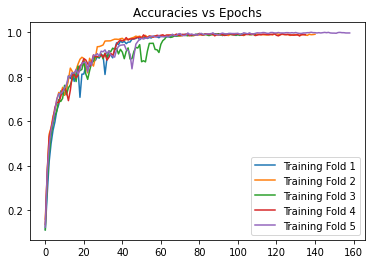

In [ ]:
plt.title('Accuracies vs Epochs')
plt.plot(history[0].history['accuracy'], label='Training Fold 1')
plt.plot(history[1].history['accuracy'], label='Training Fold 2')
plt.plot(history[2].history['accuracy'], label='Training Fold 3')
plt.plot(history[3].history['accuracy'], label='Training Fold 4')
plt.plot(history[4].history['accuracy'], label='Training Fold 5')
plt.legend()
plt.show()

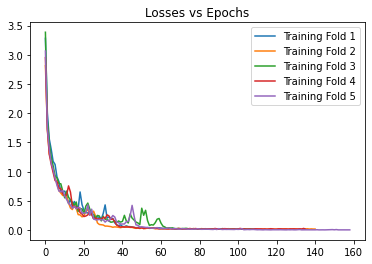

In [ ]:
plt.title('Losses vs Epochs')
plt.plot(history[0].history['loss'], label='Training Fold 1')
plt.plot(history[1].history['loss'], label='Training Fold 2')
plt.plot(history[2].history['loss'], label='Training Fold 3')
plt.plot(history[3].history['loss'], label='Training Fold 4')
plt.plot(history[4].history['loss'], label='Training Fold 5')
plt.legend()
plt.show()

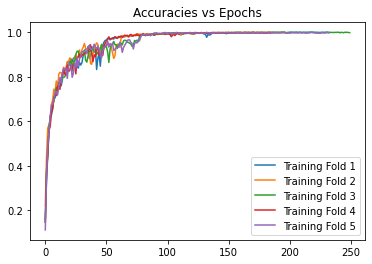

In [ ]:
plt.title('Accuracies vs Epochs')
plt.plot(history[0].history['accuracy'], label='Training Fold 1')
plt.plot(history[1].history['accuracy'], label='Training Fold 2')
plt.plot(history[2].history['accuracy'], label='Training Fold 3')
plt.plot(history[3].history['accuracy'], label='Training Fold 4')
plt.plot(history[4].history['accuracy'], label='Training Fold 5')
plt.legend()
plt.show()

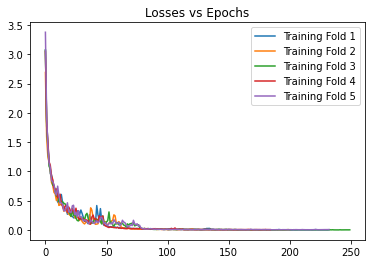

In [ ]:
plt.title('Losses vs Epochs')
plt.plot(history[0].history['loss'], label='Training Fold 1')
plt.plot(history[1].history['loss'], label='Training Fold 2')
plt.plot(history[2].history['loss'], label='Training Fold 3')
plt.plot(history[3].history['loss'], label='Training Fold 4')
plt.plot(history[4].history['loss'], label='Training Fold 5')
plt.legend()
plt.show()

In [ ]:
storing_path = "/content/drive/MyDrive/Total_model/GroupNormalize"
for i in range (5):
  models[i].save(storing_path + '/03.05.CNNmodel.train{:.4f}.test{:.4f}.train_time{:.2f}'.format(training_results[i] * 100, testing_results[i] * 100, fit_times[i]))

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Total_model/GroupNormalize/03.05.CNNmodel.train99.9351.test85.1948.train_time1121.34/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Total_model/GroupNormalize/03.05.CNNmodel.train99.8701.test82.0779.train_time1135.40/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Total_model/GroupNormalize/03.05.CNNmodel.train99.9351.test84.9351.train_time904.12/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Total_model/GroupNormalize/03.05.CNNmodel.train99.4805.test81.5584.train_time988.72/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Total_model/GroupNormalize/03.05.CNNmodel.train99.4805.test82.5974.train_time874.17/assets


                        precision    recall  f1-score   support

Alternaria Leaf Blight       1.00      0.95      0.98       126
                Canker       0.98      0.98      0.98        62
             Chlorosis       0.97      0.93      0.95       111
                  Esca       0.99      0.96      0.97        73
               Eyespot       0.97      0.97      0.97        62
             Khoe manh       0.97      0.98      0.97       513
               Monilia       0.98      0.97      0.98        65
  Northern leaf blight       0.94      0.92      0.93        66
            Phan trang       0.96      0.97      0.96       254
                  Rust       0.97      0.97      0.97        93
             Suong mai       0.93      1.00      0.96        74
              Than thu       0.94      1.00      0.97        64
      Cedar-apple rust       0.97      0.95      0.96        63
            Black mold       0.98      1.00      0.99        60
            Ghost spot       0.97      

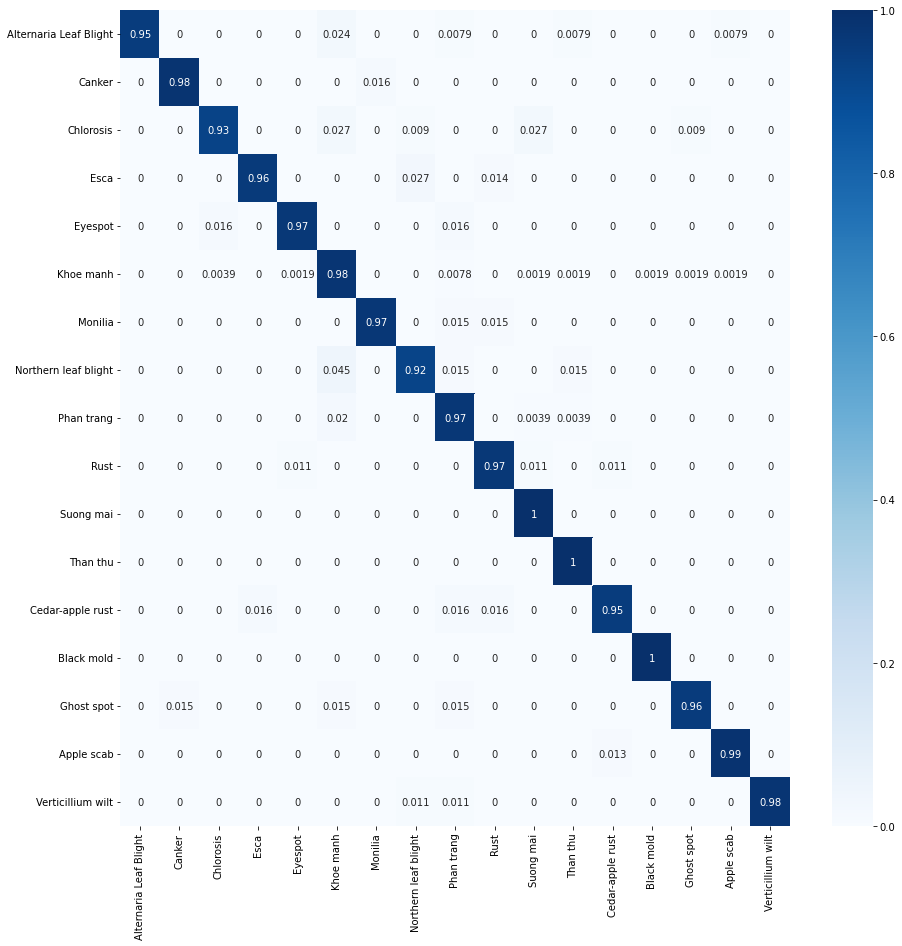

In [ ]:
  predict = models[3].predict(X)
  predicted_labels = []
  for vector in predict:
    predicted_labels.append(np.argmax(vector))
  predicted_labels = np.array(predicted_labels)

  print(classification_report(y, predicted_labels, target_names=CAC_BENH))
  
  fig = plt.figure(figsize=(15, 15))
  mtx = confusion_matrix(y, predicted_labels )
  mtx = mtx/mtx.sum(axis = 1, keepdims = True)
  sns.heatmap(mtx, annot=True, cmap='Blues', xticklabels= CAC_BENH, yticklabels = CAC_BENH )

In [ ]:
for train_index, test_index in skf.split(X, y):
      x_train_fold, x_test_fold = X[train_index], X[test_index]
      y_train_fold, y_test_fold = y[train_index], y[test_index]
      res_show(models[3], x_train_fold, y_train_fold)
      
      res_show(models[3], x_test_fold, y_test_fold)
      print("---"*12)

Accuracy:  0.9623376623376624
Precision:  0.9627277776189371
Recall:  0.9614275467290258
F1-Score:  0.9616998441620228
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-Score:  1.0
------------------------------------
Accuracy:  0.9623376623376624
Precision:  0.9627106806333923
Recall:  0.9614482682418943
F1-Score:  0.9617027920778284
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-Score:  1.0
------------------------------------
Accuracy:  0.962987012987013
Precision:  0.9635959955271529
Recall:  0.9614705579634361
F1-Score:  0.9621905029284608
Accuracy:  0.9974025974025974
Precision:  0.9957983193277312
Recall:  0.9994232987312573
F1-Score:  0.997531579681681
------------------------------------
Accuracy:  0.9993506493506493
Precision:  0.9988901220865705
Recall:  0.9998568770573922
F1-Score:  0.9993681272752707
Accuracy:  0.8519480519480519
Precision:  0.8585854372573979
Recall:  0.847093431817229
F1-Score:  0.8481715528707795
------------------------------------
Accuracy:  0.9623376623

# **Visualize**

In [ ]:
pretrain_model = models[3]

In [ ]:
img_path = '/content/drive/MyDrive/ImageDB/Total/Phan trang/1.jpg'

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
net_input_size = (128, 128)
frame = load_img(img_path, target_size=net_input_size)
frame = img_to_array(frame)
frame = np.expand_dims(frame, axis=0)
# frame = model.preprocess_input(frame)

feature_maps = pretrain_model.predict(frame)

In [ ]:
pretrain_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 128, 32)      128       
                                                                 
 activation_28 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 group_normalization_24 (Gro  (None, 128, 128, 32)     64        
 upNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 64, 64)        2112      
                                                                 
 activation_29 (Activation)  (None, 64, 64, 64)       

In [ ]:
with tf.GradientTape() as tape:
	# Tạo ra một model mới có 1 input và 2 output là output của model và output của conv layer cuối cùng
	last_conv_layer = pretrain_model.get_layer('conv2d_23')
	new_model = tf.keras.models.Model([pretrain_model.inputs], [pretrain_model.output, last_conv_layer.output])

	# Đưa ảnh vào model mới để lấy output
	model_out, last_conv_layer = new_model(frame)

	# Lấy output có prob lớn nhất
	class_out = model_out[:, np.argmax(model_out[0])]

	# Tính gradient của class output đối với output của last_conv_layer
	grads = tape.gradient(class_out, last_conv_layer)


	# Tính giá trị trung bình của gradient, kết quả là 1 vector 512
	pooled_grads = K.mean(grads, axis=(0, 1, 2))

In [ ]:
# Nhân pooled_grads với output của last_conv_layer và lấy mean để có heatmap.
# Chú ý last_conv_layer có size (1, 14,14,512)
# Output là heatmap size (1,14,14)
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

# Xử lý heat map, bỏ giá trị âm, scale lại giá trị về 0,1
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((16, 16))

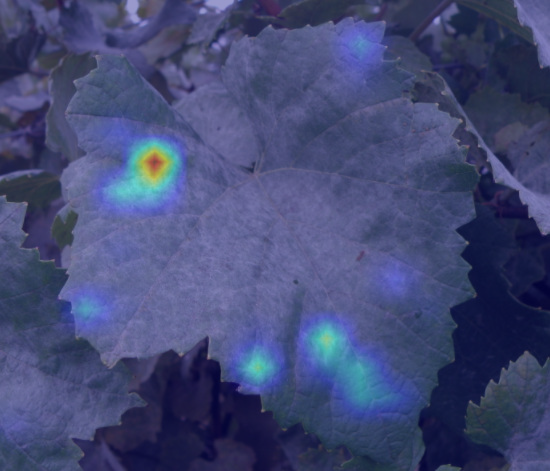

-1

In [ ]:
# Vẽ heatmap lên ảnh
# Đọc ảnh con bò
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread(img_path)

# Chỉnh lại heatmap
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

# Vẽ heatmap lên ảnh
overlay_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
cv2_imshow(overlay_img)
cv2.waitKey()